In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
import glob
import math

In [2]:
import os
import time
import unicodedata
import sklearn
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas_datareader import data as pdr
from pylab import rcParams
from tqdm import tqdm_notebook
from xgboost import XGBRegressor
from datetime import date
from matplotlib import pyplot as plt

In [3]:
path = '/Users/kate/CSCE633/facebook'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

facebook = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [4]:
# facebook = pd.DataFrame(facebook.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
facebook[['DATE','TIME']] = facebook.DATETIME.str.split(expand=True)
facebook[["YEAR", "MONTH", "DAY"]] = facebook.DATE.str.split(".", expand=True)
facebook[["HOUR", "MINUTES", "SECONDS"]] = facebook.TIME.str.split(":", expand=True)

In [5]:
facebook.loc[:, 'DATE'] = pd.to_datetime(facebook['DATE'],format='%Y.%m.%d')
facebook = facebook.sort_values(['DATETIME'])

In [6]:
new_facebook = facebook
facebook.head()


,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
0,2012.05.18 11:00:00,42.05,45.00,38.86,38.00,2119935,422063,40.464,2012-05-18,11:00:00,2012,05,18,11,00,00
1,2012.05.18 12:00:00,38.85,42.00,41.01,38.01,918855,398534,40.442,2012-05-18,12:00:00,2012,05,18,12,00,00
2,2012.05.18 13:00:00,41.00,42.00,40.17,40.13,555244,212849,41.094,2012-05-18,13:00:00,2012,05,18,13,00,00
3,2012.05.18 14:00:00,40.15,42.00,39.13,38.00,696831,206701,40.131,2012-05-18,14:00:00,2012,05,18,14,00,00
4,2012.05.18 15:00:00,39.13,40.25,38.18,38.00,1078805,226303,38.197,2012-05-18,15:00:00,2012,05,18,15,00,00


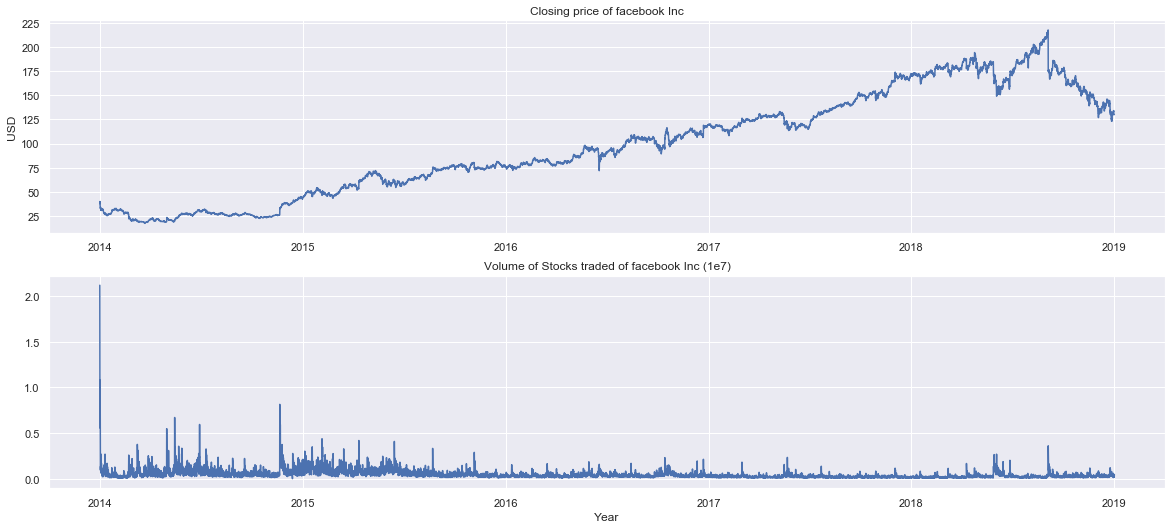

In [9]:
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2014, 2019, num = 11602)
ax[0].plot(date, facebook['CLOSE'])
ax[0].set_title('Closing price of facebook Inc')
ax[0].set_ylabel("USD")

ax[1].plot(date, facebook['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of facebook Inc (1e7)')
ax[1].set_xlabel("Year")

plt.show()

Text(0, 0.5, 'USD')

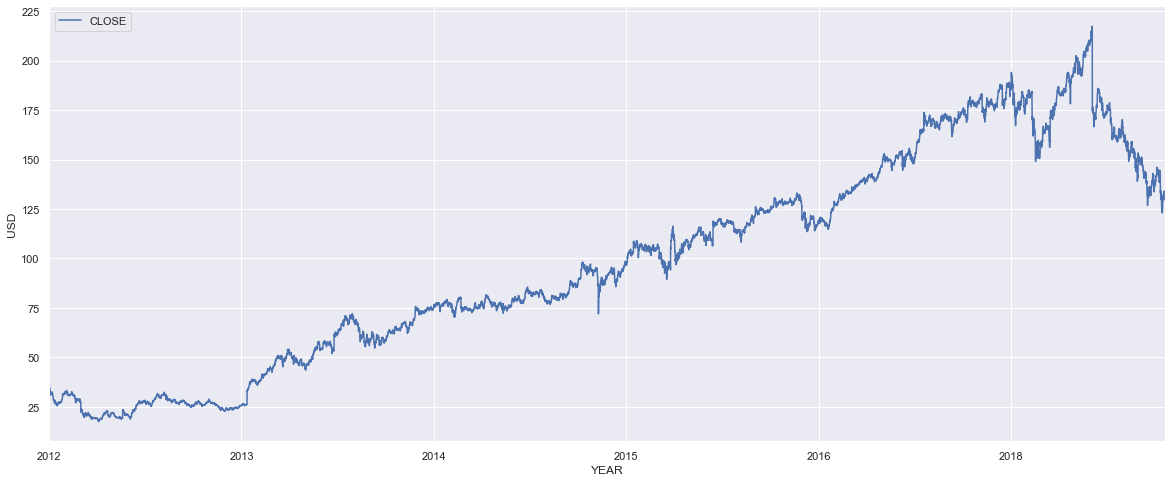

In [10]:
rcParams['figure.figsize'] = 20, 8 # width 10, height 8

ax = facebook.plot(x='YEAR', y='CLOSE', style='b-', grid=True)
ax.set_xlabel("YEAR")
ax.set_ylabel("USD")

In [11]:
facebook.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
0,2012.05.18 11:00:00,42.05,45.00,38.86,38.00,2119935,422063,40.464,2012-05-18,11:00:00,2012,05,18,11,00,00
1,2012.05.18 12:00:00,38.85,42.00,41.01,38.01,918855,398534,40.442,2012-05-18,12:00:00,2012,05,18,12,00,00
2,2012.05.18 13:00:00,41.00,42.00,40.17,40.13,555244,212849,41.094,2012-05-18,13:00:00,2012,05,18,13,00,00
3,2012.05.18 14:00:00,40.15,42.00,39.13,38.00,696831,206701,40.131,2012-05-18,14:00:00,2012,05,18,14,00,00
4,2012.05.18 15:00:00,39.13,40.25,38.18,38.00,1078805,226303,38.197,2012-05-18,15:00:00,2012,05,18,15,00,00


Text(0, 0.5, 'USD')

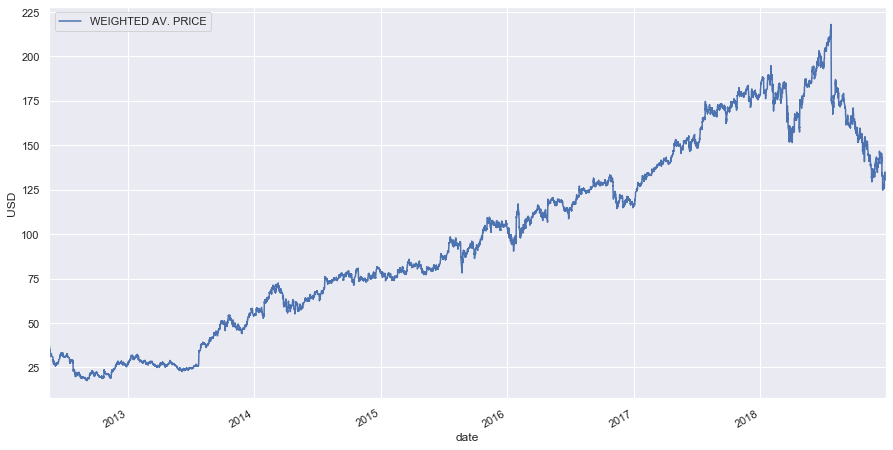

In [12]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

ax = facebook.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [13]:
# Get difference between high and low of each hour
facebook['RANGE_HL'] = facebook['HIGH'] - facebook['LOW']
#df.drop(['high', 'low'], axis=1, inplace=True)

# Get difference between open and close of each hour
facebook['RANGE_OC'] = facebook['OPEN'] - facebook['CLOSE']
#df.drop(['open', 'close'], axis=1, inplace=True)

facebook.head(10)

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,RANGE_HL,RANGE_OC
0,2012.05.18 11:00:00,42.05,45.00,38.86,38.00,2119935,422063,40.464,2012-05-18,11:00:00,2012,05,18,11,00,00,6.14,4.05
1,2012.05.18 12:00:00,38.85,42.00,41.01,38.01,918855,398534,40.442,2012-05-18,12:00:00,2012,05,18,12,00,00,0.99,0.84
2,2012.05.18 13:00:00,41.00,42.00,40.17,40.13,555244,212849,41.094,2012-05-18,13:00:00,2012,05,18,13,00,00,1.83,0.87
3,2012.05.18 14:00:00,40.15,42.00,39.13,38.00,696831,206701,40.131,2012-05-18,14:00:00,2012,05,18,14,00,00,2.87,2.15
4,2012.05.18 15:00:00,39.13,40.25,38.18,38.00,1078805,226303,38.197,2012-05-18,15:00:00,2012,05,18,15,00,00,2.07,1.13
5,2012.05.21 09:30:00,36.53,36.66,33.76,33.00,602624,193146,34.668,2012-05-21,09:30:00,2012,05,21,09,30,00,2.90,3.53
6,2012.05.21 10:00:00,33.76,34.24,33.73,33.19,242530,97917,33.842,2012-05-21,10:00:00,2012,05,21,10,00,00,0.51,0.57
7,2012.05.21 11:00:00,33.73,34.40,33.74,33.53,111414,45700,33.830,2012-05-21,11:00:00,2012,05,21,11,00,00,0.66,0.20
8,2012.05.21 12:00:00,33.74,34.25,34.16,33.50,94826,41446,33.903,2012-05-21,12:00:00,2012,05,21,12,00,00,0.09,0.24
9,2012.05.21 13:00:00,34.15,35.05,34.74,34.10,134905,53327,34.678,2012-05-21,13:00:00,2012,05,21,13,00,00,0.31,0.05


In [14]:
 facebook.drop(['HIGH', 'LOW', 'OPEN', 'CLOSE', 'DATETIME', 'MONTH', 'DAY', 'MINUTES', 'SECONDS'], axis=1, inplace=True)

In [15]:
facebook.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC
0,2119935,422063,40.464,2012-05-18,11:00:00,2012,11,6.14,4.05
1,918855,398534,40.442,2012-05-18,12:00:00,2012,12,0.99,0.84
2,555244,212849,41.094,2012-05-18,13:00:00,2012,13,1.83,0.87
3,696831,206701,40.131,2012-05-18,14:00:00,2012,14,2.87,2.15
4,1078805,226303,38.197,2012-05-18,15:00:00,2012,15,2.07,1.13
5,602624,193146,34.668,2012-05-21,09:30:00,2012,09,2.90,3.53
6,242530,97917,33.842,2012-05-21,10:00:00,2012,10,0.51,0.57
7,111414,45700,33.830,2012-05-21,11:00:00,2012,11,0.66,0.20
8,94826,41446,33.903,2012-05-21,12:00:00,2012,12,0.09,0.24
9,134905,53327,34.678,2012-05-21,13:00:00,2012,13,0.31,0.05


In [16]:
facebook['ORDER_HOURS'] = [x for x in list(range(len(facebook)))]

# merging_keys
merging_keys = ['ORDER_HOURS']

# List of columns that we will use to create lags
lag_cols = ['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']
lag_cols

['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']

In [17]:
facebook.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS
0,2119935,422063,40.464,2012-05-18,11:00:00,2012,11,6.14,4.05,0
1,918855,398534,40.442,2012-05-18,12:00:00,2012,12,0.99,0.84,1
2,555244,212849,41.094,2012-05-18,13:00:00,2012,13,1.83,0.87,2
3,696831,206701,40.131,2012-05-18,14:00:00,2012,14,2.87,2.15,3
4,1078805,226303,38.197,2012-05-18,15:00:00,2012,15,2.07,1.13,4
5,602624,193146,34.668,2012-05-21,09:30:00,2012,09,2.90,3.53,5
6,242530,97917,33.842,2012-05-21,10:00:00,2012,10,0.51,0.57,6
7,111414,45700,33.830,2012-05-21,11:00:00,2012,11,0.66,0.20,7
8,94826,41446,33.903,2012-05-21,12:00:00,2012,12,0.09,0.24,8
9,134905,53327,34.678,2012-05-21,13:00:00,2012,13,0.31,0.05,9


In [18]:
N = 7
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = facebook[merging_keys + lag_cols].copy()
    
    # E.g. order_day of 0 becomes 1, for shift = 1.
    # So when this is merged with order_day of 1 in df, this will represent lag of 1.
    train_shift['ORDER_HOURS'] = train_shift['ORDER_HOURS'] + shift
    
    foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns=foo)

    facebook = pd.merge(facebook, train_shift, on=merging_keys, how='left') #.fillna(0)
    
    del train_shift

# Remove the first N rows which contain NaNs
facebook = facebook[N:]
    
facebook.head(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_5,VOLUME_lag_5,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7
7,111414,45700,33.830,2012-05-21,11:00:00,2012,11,0.66,0.20,7,...,0.87,555244.0,40.442,0.99,0.84,918855.0,40.464,6.14,4.05,2119935.0
8,94826,41446,33.903,2012-05-21,12:00:00,2012,12,0.09,0.24,8,...,2.15,696831.0,41.094,1.83,0.87,555244.0,40.442,0.99,0.84,918855.0
9,134905,53327,34.678,2012-05-21,13:00:00,2012,13,0.31,0.05,9,...,1.13,1078805.0,40.131,2.87,2.15,696831.0,41.094,1.83,0.87,555244.0
10,83954,38838,34.493,2012-05-21,14:00:00,2012,14,0.25,0.63,10,...,3.53,602624.0,38.197,2.07,1.13,1078805.0,40.131,2.87,2.15,696831.0
11,260600,69352,34.119,2012-05-21,15:00:00,2012,15,0.55,0.65,11,...,0.57,242530.0,34.668,2.90,3.53,602624.0,38.197,2.07,1.13,1078805.0
12,270311,92001,31.747,2012-05-22,09:30:00,2012,09,1.09,1.68,12,...,0.20,111414.0,33.842,0.51,0.57,242530.0,34.668,2.90,3.53,602624.0
13,174485,68290,32.266,2012-05-22,10:00:00,2012,10,0.09,0.46,13,...,0.24,94826.0,33.830,0.66,0.20,111414.0,33.842,0.51,0.57,242530.0
14,119061,49110,33.152,2012-05-22,11:00:00,2012,11,0.65,0.12,14,...,0.05,134905.0,33.903,0.09,0.24,94826.0,33.830,0.66,0.20,111414.0
15,74032,29575,32.598,2012-05-22,12:00:00,2012,12,0.64,0.82,15,...,0.63,83954.0,34.678,0.31,0.05,134905.0,33.903,0.09,0.24,94826.0
16,59377,24223,32.243,2012-05-22,13:00:00,2012,13,0.55,0.51,16,...,0.65,260600.0,34.493,0.25,0.63,83954.0,34.678,0.31,0.05,134905.0


In [19]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11595 entries, 7 to 11601
Data columns (total 38 columns):
VOLUME                      11595 non-null int64
NUMBER OF TRADES            11595 non-null int64
WEIGHTED AV. PRICE          11595 non-null float64
DATE                        11595 non-null datetime64[ns]
TIME                        11595 non-null object
YEAR                        11595 non-null object
HOUR                        11595 non-null object
RANGE_HL                    11595 non-null float64
RANGE_OC                    11595 non-null float64
ORDER_HOURS                 11595 non-null int64
WEIGHTED AV. PRICE_lag_1    11595 non-null float64
RANGE_HL_lag_1              11595 non-null float64
RANGE_OC_lag_1              11595 non-null float64
VOLUME_lag_1                11595 non-null float64
WEIGHTED AV. PRICE_lag_2    11595 non-null float64
RANGE_HL_lag_2              11595 non-null float64
RANGE_OC_lag_2              11595 non-null float64
VOLUME_lag_2              

In [20]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [22]:
cols_list = [
"WEIGHTED AV. PRICE",
"RANGE_HL",
"RANGE_OC",
"VOLUME"
]


for col in cols_list:
    facebook = get_mov_avg_std(facebook, col, N)
facebook.head()

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std
7,111414,45700,33.830,2012-05-21,11:00:00,2012,11,0.66,0.20,7,...,4.05,2119935.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,94826,41446,33.903,2012-05-21,12:00:00,2012,12,0.09,0.24,8,...,0.84,918855.0,33.8300,NaN,0.660000,NaN,0.200000,NaN,111414.00,NaN
9,134905,53327,34.678,2012-05-21,13:00:00,2012,13,0.31,0.05,9,...,0.87,555244.0,33.8665,0.051619,0.375000,0.403051,0.220000,0.028284,103120.00,11729.487286
10,83954,38838,34.493,2012-05-21,14:00:00,2012,14,0.25,0.63,10,...,2.15,696831.0,34.1370,0.469939,0.353333,0.287460,0.163333,0.100167,113715.00,20138.334365
11,260600,69352,34.119,2012-05-21,15:00:00,2012,15,0.55,0.65,11,...,1.13,1078805.0,34.2260,0.422981,0.327500,0.240330,0.280000,0.247252,106274.75,22176.510567


In [52]:
cv_size = 0.0
test_size = 0.2
# Get sizes of each of the datasets
num_cv = int(cv_size*len(facebook))
num_test = int(test_size*len(facebook))
num_train = len(facebook) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = facebook[:num_train]
cv = facebook[num_train:num_train+num_cv]
train_cv = facebook[:num_train+num_cv]
test = facebook[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 9276
num_cv = 0
num_test = 2319
train.shape = (9276, 46)
cv.shape = (0, 46)
train_cv.shape = (9276, 46)
test.shape = (2319, 46)


In [53]:
cols_to_scale = [
"WEIGHTED AV. PRICE"
]
N = 7
for i in range(1,N+1):
    cols_to_scale.append("WEIGHTED AV. PRICE_lag_"+str(i))
    cols_to_scale.append("RANGE_HL_lag_"+str(i))
    cols_to_scale.append("RANGE_OC_lag_"+str(i))
    cols_to_scale.append("VOLUME_lag_"+str(i))

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[cols_to_scale])
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))
print("train_scaled.shape = " + str(train_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)
train_scaled[['DATE', 'HOUR']] = train.reset_index()[['DATE', 'HOUR']]
print("train_scaled.shape = " + str(train_scaled.shape))
train_scaled.head()

scaler.mean_ = [8.03146422e+01 8.02997330e+01 3.00148771e-01 3.16269944e-01
 4.90815886e+04 8.02849194e+01 3.00424752e-01 3.16610608e-01
 4.91456590e+04 8.02704714e+01 3.00618801e-01 3.16691462e-01
 4.92607099e+04 8.02561783e+01 3.00868909e-01 3.16881199e-01
 4.93347678e+04 8.02420066e+01 3.01055412e-01 3.16958818e-01
 4.93932625e+04 8.02278367e+01 3.01153514e-01 3.16997628e-01
 4.94903028e+04 8.02136405e+01 3.01734584e-01 3.17345839e-01
 4.97164624e+04]
scaler.var_ = [1.69712219e+03 1.69644579e+03 1.08456274e-01 1.26674961e-01
 2.04743289e+09 1.69576196e+03 1.09184705e-01 1.27787951e-01
 2.08028202e+09 1.69504162e+03 1.09522148e-01 1.27858836e-01
 2.19441154e+09 1.69429383e+03 1.10227080e-01 1.28220556e-01
 2.23944655e+09 1.69354065e+03 1.10474770e-01 1.28250529e-01
 2.26689010e+09 1.69280588e+03 1.10520662e-01 1.28277154e-01
 2.34827592e+09 1.69206526e+03 1.14173910e-01 1.29752054e-01
 2.81027629e+09]
train_scaled.shape = (9276, 29)
train_scaled.shape = (9276, 31)


,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-1.128374,-1.127945,0.637212,0.712897,4.275238,-1.107754,7.867224,8.989145,12.134993,-1.021923,...,-0.966997,2.072052,1.460256,17.940207,-0.966328,17.278276,10.362407,39.051856,2012-05-21,11
1,-1.126602,-1.128237,1.092687,-0.326680,1.377555,-1.127813,0.634248,0.708832,4.239945,-1.107639,...,-0.951150,4.598775,1.544018,10.436731,-0.966863,2.036913,1.450966,16.395116,2012-05-21,12
2,-1.107789,-1.126464,-0.638116,-0.214293,1.010958,-1.128104,1.088200,-0.326207,1.365231,-1.127702,...,-0.974555,7.727098,5.117860,13.358520,-0.951013,4.522883,1.534251,9.536089,2012-05-21,13
3,-1.112280,-1.107648,0.029913,-0.748129,1.896710,-1.126332,-0.636819,-0.214311,1.001540,-1.127993,...,-1.021561,5.320695,2.269955,21.240934,-0.974424,7.600750,5.087722,12.206935,2012-05-21,14
4,-1.121358,-1.112140,-0.152277,0.881476,0.770685,-1.107512,0.028978,-0.745817,1.880270,-1.126220,...,-1.107334,7.817338,8.970908,11.414465,-1.021440,5.233160,2.256050,19.412355,2012-05-21,15


In [54]:
# Do scaling for train+dev set
scaler_train_cv = StandardScaler()
train_cv_scaled = scaler_train_cv.fit_transform(train_cv[cols_to_scale])
print("scaler_train_cv.mean_ = " + str(scaler_train_cv.mean_))
print("scaler_train_cv.var_ = " + str(scaler_train_cv.var_))
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=cols_to_scale)
train_cv_scaled[['DATE', 'HOUR']] = train_cv.reset_index()[['DATE', 'HOUR']]
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))
train_cv_scaled.head()

scaler_train_cv.mean_ = [8.03146422e+01 8.02997330e+01 3.00148771e-01 3.16269944e-01
 4.90815886e+04 8.02849194e+01 3.00424752e-01 3.16610608e-01
 4.91456590e+04 8.02704714e+01 3.00618801e-01 3.16691462e-01
 4.92607099e+04 8.02561783e+01 3.00868909e-01 3.16881199e-01
 4.93347678e+04 8.02420066e+01 3.01055412e-01 3.16958818e-01
 4.93932625e+04 8.02278367e+01 3.01153514e-01 3.16997628e-01
 4.94903028e+04 8.02136405e+01 3.01734584e-01 3.17345839e-01
 4.97164624e+04]
scaler_train_cv.var_ = [1.69712219e+03 1.69644579e+03 1.08456274e-01 1.26674961e-01
 2.04743289e+09 1.69576196e+03 1.09184705e-01 1.27787951e-01
 2.08028202e+09 1.69504162e+03 1.09522148e-01 1.27858836e-01
 2.19441154e+09 1.69429383e+03 1.10227080e-01 1.28220556e-01
 2.23944655e+09 1.69354065e+03 1.10474770e-01 1.28250529e-01
 2.26689010e+09 1.69280588e+03 1.10520662e-01 1.28277154e-01
 2.34827592e+09 1.69206526e+03 1.14173910e-01 1.29752054e-01
 2.81027629e+09]
train_cv_scaled.shape = (9276, 29)
train_cv_scaled.shape = (9276,

,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-1.128374,-1.127945,0.637212,0.712897,4.275238,-1.107754,7.867224,8.989145,12.134993,-1.021923,...,-0.966997,2.072052,1.460256,17.940207,-0.966328,17.278276,10.362407,39.051856,2012-05-21,11
1,-1.126602,-1.128237,1.092687,-0.326680,1.377555,-1.127813,0.634248,0.708832,4.239945,-1.107639,...,-0.951150,4.598775,1.544018,10.436731,-0.966863,2.036913,1.450966,16.395116,2012-05-21,12
2,-1.107789,-1.126464,-0.638116,-0.214293,1.010958,-1.128104,1.088200,-0.326207,1.365231,-1.127702,...,-0.974555,7.727098,5.117860,13.358520,-0.951013,4.522883,1.534251,9.536089,2012-05-21,13
3,-1.112280,-1.107648,0.029913,-0.748129,1.896710,-1.126332,-0.636819,-0.214311,1.001540,-1.127993,...,-1.021561,5.320695,2.269955,21.240934,-0.974424,7.600750,5.087722,12.206935,2012-05-21,14
4,-1.121358,-1.112140,-0.152277,0.881476,0.770685,-1.107512,0.028978,-0.745817,1.880270,-1.126220,...,-1.107334,7.817338,8.970908,11.414465,-1.021440,5.233160,2.256050,19.412355,2012-05-21,15


In [55]:
def scale_row(row, feat_mean, feat_std):
    """
    Given a pandas series in row, scale it to have 0 mean and var 1 using feat_mean and feat_std
    Inputs
        row      : pandas series. Need to scale this.
        feat_mean: mean  
        feat_std : standard deviation
    Outputs
        row_scaled : pandas series with same length as row, but scaled
    """
    # If feat_std = 0 (this happens if adj_close doesn't change over N days), 
    # set it to a small number to avoid division by zero
    feat_std = 0.001 if feat_std == 0 else feat_std
    
    row_scaled = (row-feat_mean) / feat_std
    
    return row_scaled

In [56]:
# Do scaling for dev set
cv_scaled = cv[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = cv.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    cv_scaled = pd.concat([cv_scaled, temp], axis=1)
    
# Now the entire dev set is scaled
cv_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [57]:
cv_scaled.tail()

,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [58]:
# Do scaling for test set
test_scaled = test[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = test.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    test_scaled = pd.concat([test_scaled, temp], axis=1)
    
# Now the entire test set is scaled
test_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
9283,2017-09-05,-0.373339,-0.585893,-0.108517,1.626761,1.058788,-1.272338,-0.345463,0.113566,-0.053794,...,-1.006048,0.402419,1.853567,-0.023671,-1.129331,-0.459617,-0.810778,-0.244803,0.990683,1.677517
9284,2017-09-05,-1.674511,-0.014945,-0.159979,0.165753,1.349798,0.962249,-0.628366,-0.731583,0.665075,...,0.264652,-1.217400,0.820421,1.017318,0.170339,-1.298137,-0.408660,-0.875053,-0.123356,1.517548
9285,2017-09-05,-0.596180,-1.687245,-0.020805,-0.166439,0.160641,1.349591,0.960437,1.870766,-0.897968,...,0.000000,0.047691,-1.096898,1.528973,1.007606,0.165833,-1.293616,-0.409607,-0.873133,-0.126056
9286,2017-09-05,-1.482919,-0.117073,-1.028301,0.363466,0.241836,0.515005,1.507985,-0.482854,1.949083,...,-0.347334,-0.294479,-0.241624,-0.201434,1.537901,1.017791,0.178047,-1.277884,-0.396006,-0.858415
9287,2017-09-05,-1.853455,-0.641259,0.412489,-0.290523,0.783224,0.689387,0.900137,1.400441,-0.546747,...,-1.210192,-0.521896,-0.495423,0.840321,-0.485756,1.259635,0.737714,-0.104954,-1.565955,-0.681005


In [59]:
test_scaled.tail()

,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
11597,2018-12-31,-1.990904,-0.273210,-0.001763,1.243544,0.196535,0.546419,0.279379,0.298322,1.264935,...,-0.568532,-0.731403,-0.674752,0.694888,-0.034200,1.731973,0.013214,-1.381031,-0.307900,-0.716943
11598,2018-12-31,-1.454740,-1.260574,0.067253,0.277089,1.239746,0.430378,0.700849,-0.946542,0.359953,...,-0.940271,-0.571458,-0.734587,-0.391160,0.662607,-0.094378,1.739374,-0.045150,-1.492742,-0.378550
11599,2018-12-31,-1.060020,-1.066986,-0.886501,0.347761,0.542811,1.437636,0.685299,0.112679,-0.981397,...,1.526077,-1.120194,-0.730375,-0.662729,-0.330149,0.691958,-0.042284,1.736373,0.005465,-1.398634
11600,2018-12-31,-0.962816,-0.737858,-0.744475,-0.573050,0.599258,0.784517,1.634425,-0.641922,0.052849,...,1.091413,1.525413,-1.116000,-1.154920,-0.786925,-0.423316,0.694147,-0.108595,1.836001,-0.056391
11601,2018-12-31,-0.839922,-0.785117,-0.483689,-0.492555,-0.262857,1.307953,1.556188,-0.875150,-0.714435,...,0.054295,1.101415,1.551289,-0.709561,-0.987940,-0.638314,-0.292855,0.768829,0.006156,1.853686


In [60]:
features = []
for i in range(1,N+1):
    features.append("WEIGHTED AV. PRICE_lag_"+str(i))
    features.append("RANGE_HL_lag_"+str(i))
    features.append("RANGE_OC_lag_"+str(i))
    features.append("VOLUME_lag_"+str(i))
    

    

target = "WEIGHTED AV. PRICE"


# Split into X and y
X_train = train[features]
y_train = train[target]
X_cv = cv[features]
y_cv = cv[target]
X_train_cv = train_cv[features]
y_train_cv = train_cv[target]
X_sample = test[features]
y_sample = test[target]
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))

X_train.shape = (9276, 28)
y_train.shape = (9276,)
X_cv.shape = (0, 28)
y_cv.shape = (0,)
X_train_cv.shape = (9276, 28)
y_train_cv.shape = (9276,)
X_sample.shape = (2319, 28)
y_sample.shape = (2319,)


In [61]:
# Split into X and y
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_cv_scaled = cv_scaled[features]
X_train_cv_scaled = train_cv_scaled[features]
y_train_cv_scaled = train_cv_scaled[target]
X_sample_scaled = test_scaled[features]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (9276, 28)
y_train_scaled.shape = (9276,)
X_cv_scaled.shape = (0, 112)
X_train_cv_scaled.shape = (9276, 28)
y_train_cv_scaled.shape = (9276,)
X_sample_scaled.shape = (2319, 28)


Text(0.5, 1.0, 'Without scaling')

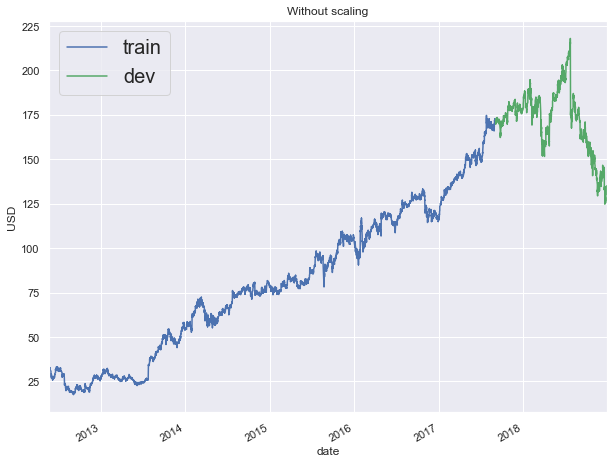

In [63]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Without scaling")

Text(0.5, 1.0, 'With scaling')

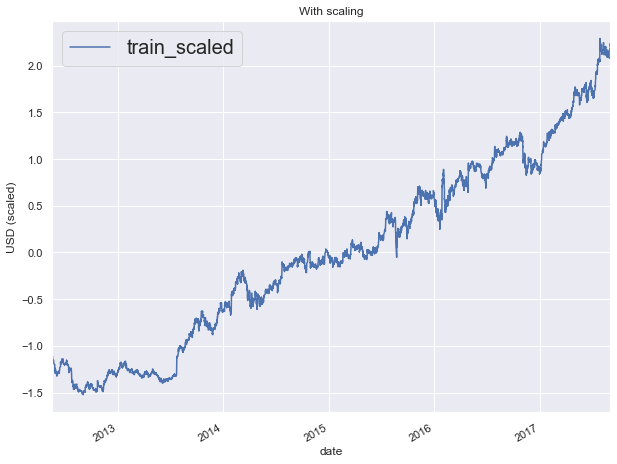

In [64]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train_scaled.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.legend(['train_scaled'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("With scaling")

REGRESSION

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
polynomial_features = PolynomialFeatures(degree=2,
                                                 include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
model = pipeline.fit(X_train_scaled, y_train_scaled)


In [66]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#results = []
rmse1 = []
mape1 = []


First we are going to see if a polynomial model will model the data well enough. We will train using degrees 1 to 4 and look at teh loss functions.

***SVR***
<br>
We are going to run the same model paramters we identified for the Apple stock C=1/8 and gamma = 1/2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 3.94 s, sys: 82 ms, total: 4.02 s
Wall time: 4.08 s


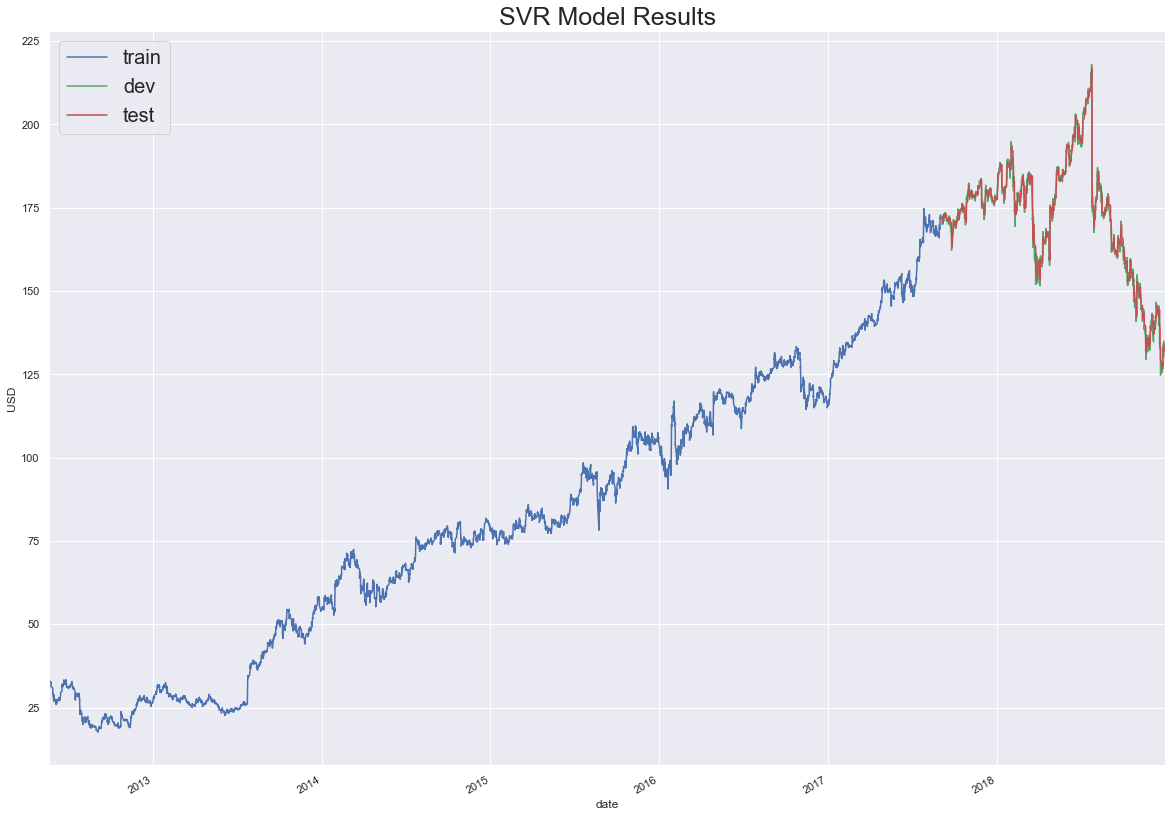

In [74]:
%%time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sys
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
results = []
val = []
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
c = 1/8
g = 1/2
svr = SVR(kernel= 'rbf', C=1/8, gamma=1/2)
model = svr.fit(X_train_scaled, y_train_scaled)
est_scaled = model.predict(X_sample_scaled)
test['est_scaled'] = est_scaled
test['est'] = test['est_scaled'] * test['WEIGHTED AV. PRICE_std'] + test['WEIGHTED AV. PRICE_mean']
mse = mean_squared_error(y_sample, test['est'])
mae = mean_absolute_error(y_sample, test['est'])
rmse = math.sqrt(mean_squared_error(y_sample, test['est']))
mape = get_mape(y_sample, test['est'])
acc = model.score( X_sample, test['est'].values.reshape(-1,1))
r2 = r2_score(y_sample, test['est'])
vals = [rmse,mape,c,g,acc,r2, mse, mae]
results.append(vals)

rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_ylabel("USD")
        



Text(0, 0.5, 'USD')

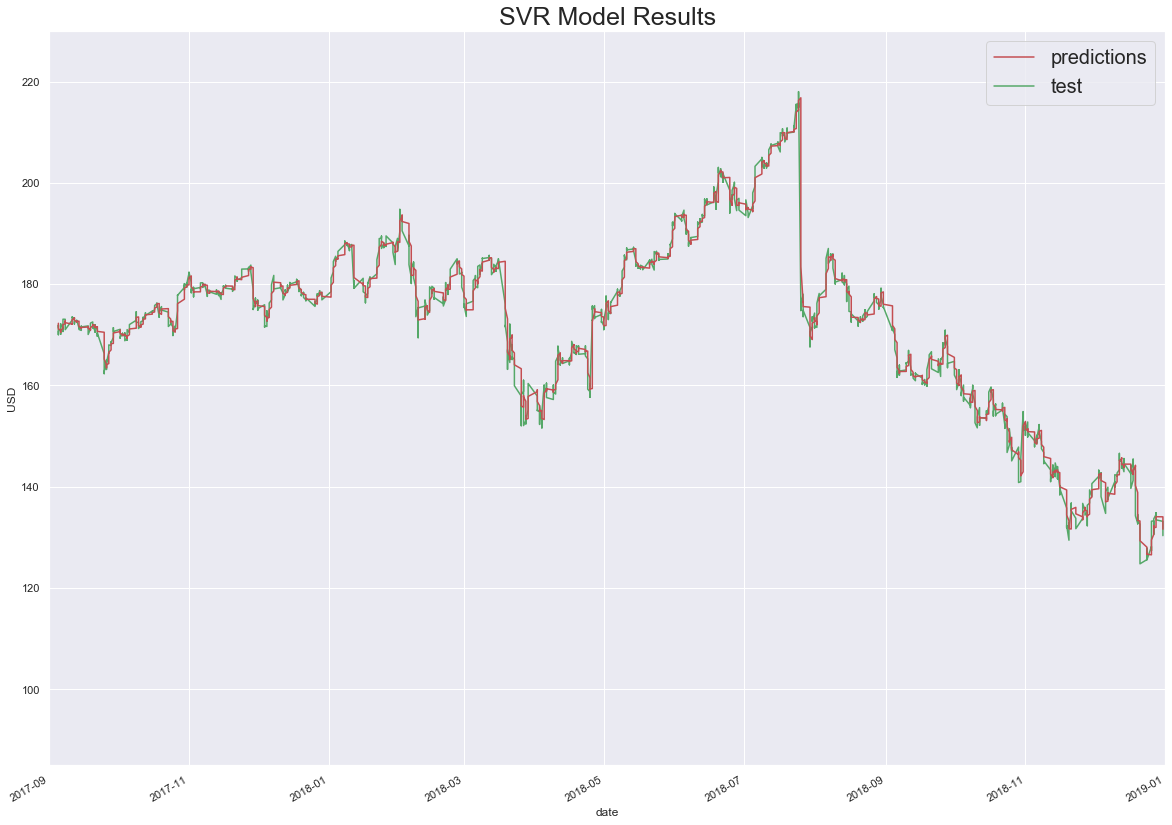

In [72]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['predictions', 'test'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_xlim(['2017-09', '2019'])
ax.set_ylim([85, 230])
ax.set_ylabel("USD")

In [73]:
print("RMSE:", rmse )
print("MAPE:", mape )
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 2.4061981141582764
MAPE: 0.8412213714187593
MSE: 5.789789364578845
MAE: 1.4136209566630593
R^2: 0.9806288116370263
